In [109]:
import pwlf
import pickle


# load pickle file
filename = r'C:\Users\svries\Documents\GitHub\JAT\Examples\DuneVolumeS\D_dataframes_per_dimension\DuneVol_fix_dataframe.pickle'
data = pickle.load(open(filename, 'rb'))

# plot dataframe in 2D
# import matplotlib.pyplot as plt
# plt.figure()
# plt.plot(data['x'], data['y'], 'o')
# plt.show()



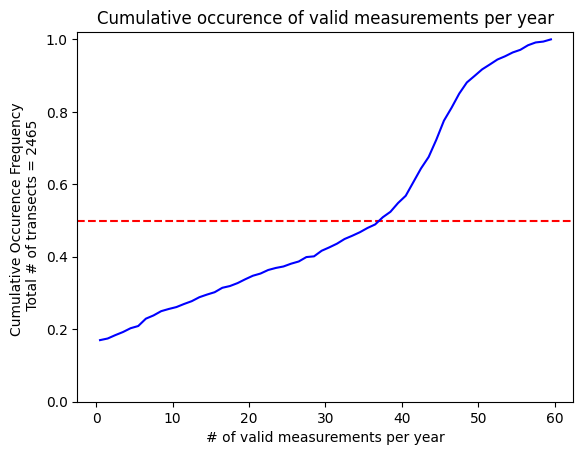

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Convert data to a NumPy array
data_array = data.to_numpy()

# Calculate the number of NaNs in each column
c_nans = np.sum(np.isnan(data_array), axis=0)

# Calculate the histogram data
hist, bin_edges = np.histogram(60 - c_nans, bins=60)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the cumulative histogram with points
plt.figure()

plt.plot(bin_centers, np.cumsum(hist)/np.cumsum(hist)[-1], linestyle='-', color='b')
# normalise the y-axis to 0-100%

plt.xlabel('# of valid measurements per year')
plt.ylabel('Cumulative Occurence Frequency \n Total # of transects = ' + str(data_array.shape[1]))
plt.title('Cumulative occurence of valid measurements per year')
# plot dashed line at 0.5 and put it behind other lines
plt.axhline(0.5, color='r', linestyle='--', zorder=-1)



# set ylim to 0-100%
plt.ylim(0, 1.02)
plt.show()

In [123]:
data_array.shape[1]

2465

1009
[8.81312787]
[ 3.41219787 21.58121317]


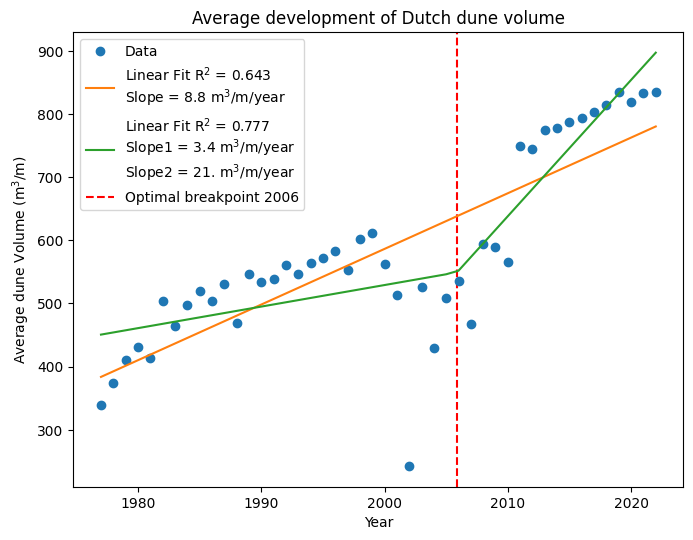

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Convert dataframe to numpy array
data_array = data.to_numpy()[:-2]

# check for the amount of nans in data_array columnwise
c_nans = np.sum(np.isnan(data_array), axis=0)

n_datapoints = 40

# filter out columns with more than 10 nans
data_array_filtered = data_array[:,c_nans<(data_array.shape[0]-n_datapoints)]
print(data_array_filtered.shape[1])

all = np.nansum(data_array_filtered/data_array_filtered.shape[1], axis=1)

x = data.index[12:-2]
y = all[12:]

my_pwlf = pwlf.PiecewiseLinFit(x, y)
res1 = my_pwlf.fit(1)
y_hat1 = my_pwlf.predict(x)

# value of slope and intercept
print(my_pwlf.slopes)

cm = 1/2.54

fig, ax = plt.subplots(figsize=(20*cm, 15*cm))
ax.plot(x, y, 'o', label='Data')
ax.plot(x, y_hat1, '-', label = 'Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5] + 
        '\nSlope = ' + str(my_pwlf.slopes[0])[0:3] + ' m$^3$/m/year')
# ax.plot(data.index[12:-2], all[12:],'o', label='transects ' + str(data_array_filtered.shape[1]) + '/' + str(data_array.shape[1]) + '\n '
# 'datapoints = ' + str(n_datapoints))

# ax.plot(x, y_hat1, '-', label='Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5])

res2 = my_pwlf.fit(2)
y_hat2 = my_pwlf.predict(x)
print(my_pwlf.slopes)



# Plot the piecewise linear fit
ax.plot(x, y_hat2, '-', label = 'Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5] + 
        '\nSlope1 = ' + str(my_pwlf.slopes[0])[0:3] + ' m$^3$/m/year' + 
        '\nSlope2 = ' + str(my_pwlf.slopes[1])[0:3] + ' m$^3$/m/year')
# Add vertical line for the optimal breakpoint
ax.axvline(x=res2[1], color='r', linestyle='--', zorder=0, label='Optimal breakpoint ' + str(res2[1].round())[0:4])

# ad abels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average dune Volume (m$^3$/m)')
ax.set_title('Average development of Dutch dune volume')



#show legend
plt.legend()




(43, 613)
530


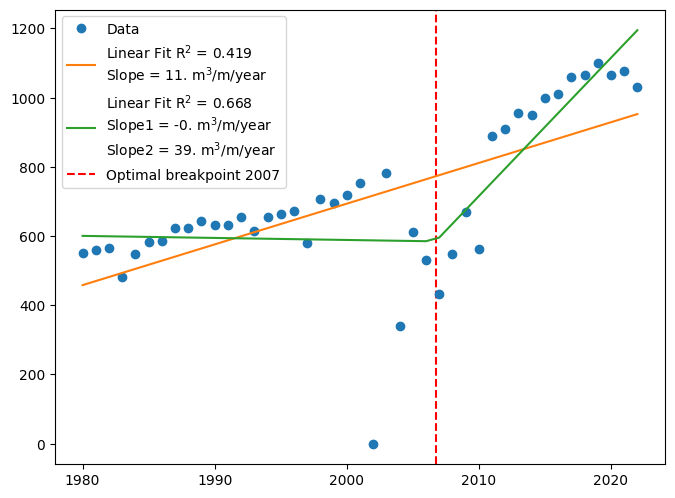

In [170]:
# filter data array for all collumns that start with 8 or 9
# data_array_sub = data_array[:,[i for i in range(data_array.shape[1]) if 
#                                     (data.columns[i].startswith('9'))]]

data_array_sub = data_array[15:-2,[i for i in range(data_array.shape[1]) if 
                                    (data.columns[i].startswith('7') | 
                                     data.columns[i].startswith('8') |
                                     data.columns[i].startswith('9'))]]


print(data_array_sub.shape)

# check for the amount of nans in data_array columnwise
c_nans = np.sum(np.isnan(data_array_sub), axis=0)


n_datapoints = 30

# filter out columns with more than 10 nans
data_array_filtered = data_array_sub[:,c_nans<(60-n_datapoints)]
print(data_array_filtered.shape[1])



all = np.nansum(data_array_filtered/data_array_filtered.shape[1], axis=1)


# plot all
# plt.figure()
# plt.plot(data.index[15:-2] , all,'o', label='transects ' + str(data_array_filtered.shape[1]) + '/' + str(data_array_sub.shape[1]) + '\n '
# 'datapoints = ' + str(n_datapoints))

x = data.index[15:-2]
y = all

my_pwlf = pwlf.PiecewiseLinFit(x, y)
res1 = my_pwlf.fit(1)
y_hat1 = my_pwlf.predict(x)

# Print R^2 value for the linear fit
#print(my_pwlf.r_squared())

# Plot the results
fig, ax = plt.subplots(figsize=(20*cm, 15*cm),dpi=100)
ax.plot(x, y, 'o', label='Data')
ax.plot(x, y_hat1, '-', label = 'Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5] + 
        '\nSlope = ' + str(my_pwlf.slopes[0])[0:3] + ' m$^3$/m/year')
# ax.plot(x, y_hat1, '-', label='Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5])

# Fit the data with 2 line segments
res2 = my_pwlf.fit(2)
y_hat2 = my_pwlf.predict(x)

# Plot the piecewise linear fit
# ax.plot(x, y_hat2, '-', label='Piecewise Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5])
ax.plot(x, y_hat2, '-', label = 'Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5] + 
        '\nSlope1 = ' + str(my_pwlf.slopes[0])[0:3] + ' m$^3$/m/year' + 
        '\nSlope2 = ' + str(my_pwlf.slopes[1])[0:3] + ' m$^3$/m/year')

# Add vertical line for the optimal breakpoint
ax.axvline(x=res2[1], color='r', linestyle='--', zorder=0, label='Optimal breakpoint ' + str(res2[1].round())[0:4])

#show legend
plt.legend()



(48, 613)
(613,)
531


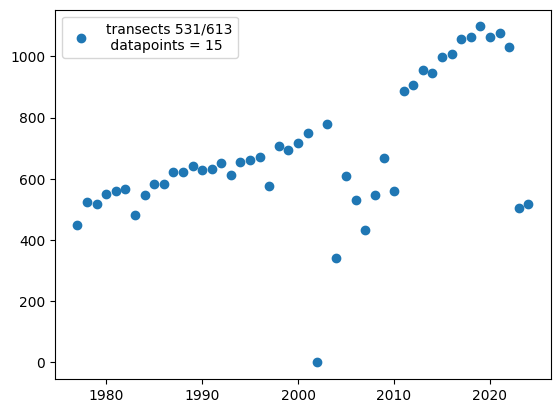

In [168]:
# filter data array for all collumns that start with 8 or 9
# data_array_sub = data_array[:,[i for i in range(data_array.shape[1]) if 
#                                     (data.columns[i].startswith('9'))]]

data_array_sub = data_array[12:,[i for i in range(data_array.shape[1]) if 
                                    (data.columns[i].startswith('7') | 
                                     data.columns[i].startswith('8') |
                                     data.columns[i].startswith('9'))]]


print(data_array_sub.shape)

# check for the amount of nans in data_array columnwise
c_nans = np.sum(np.isnan(data_array_sub), axis=0)
print(c_nans.shape)


n_datapoints = 15

# filter out columns with more than 10 nans
data_array_filtered = data_array_sub[:,c_nans<(data_array_sub.shape[0]-n_datapoints)]


print(data_array_filtered.shape[1])



all = np.nansum(data_array_filtered/data_array_filtered.shape[1], axis=1)


# plot all
plt.figure()
plt.plot(data.index[12:] , all,'o', label='transects ' + str(data_array_filtered.shape[1]) + '/' + str(data_array_sub.shape[1]) + '\n '
'datapoints = ' + str(n_datapoints))

# plot years on x-axis
# plt.xticks(np.arange(0, data_array_filtered.shape[0], step=1), data['x'])


# discard all data in the plot before 1980
# plt.xlim(1965,2025)

#show legend
plt.legend()

